**ANEMOMETER PROJECT CODE FILE:**

Author: Muntaha Pasha

**IMPORTS NEEDED**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import csv
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm

C:\Users\munta\anaconda3\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
C:\Users\munta\anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\munta\anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\munta\anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc

**READ IN WXT DATA**

Read in the 2018, 2019, and 2020 files.

In [18]:
dfWXT2018 = pd.read_csv('WXT2018', encoding='utf-8')
dfWXT2019 = pd.read_csv('WXT2019', encoding='utf-8')
dfWXT2020 = pd.read_csv('WXT2020', encoding='utf-8')

Concatenate the dataframes together into one continuous record.

In [19]:
frames = [dfWXT2018, dfWXT2019, dfWXT2020]
dfWXT = pd.concat(frames, sort=False)
dfWXT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281391 entries, 0 to 75055
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    281391 non-null  object 
 1   wdir        281391 non-null  int64  
 2   wspd        281391 non-null  float64
 3   wspd_max    281391 non-null  float64
 4   tdry        281391 non-null  float64
 5   rh          281391 non-null  float64
 6   pres        281391 non-null  float64
 7   rain_accum  281391 non-null  float64
 8   batt        281391 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.5+ MB


In [20]:
dfWXTSORT = dfWXT.sort_values('wspd', ascending=False)
dfWXTSORT.head(20)

,datetime,wdir,wspd,wspd_max,tdry,rh,pres,rain_accum,batt
81368,2019-10-11T15:17:46.8599,316,24.4,35.3,-0.9,31.9,814.0,221.6,13.9
81365,2019-10-11T15:02:46.8575,316,24.4,35.3,-1.0,31.9,814.0,220.5,13.9
81372,2019-10-11T15:37:46.8620,316,24.4,35.3,-0.1,29.0,814.3,222.5,13.9
81371,2019-10-11T15:32:46.8622,316,24.4,35.3,-0.3,31.2,814.2,222.4,13.9
81370,2019-10-11T15:27:46.8626,316,24.4,35.3,-0.5,31.8,814.0,222.1,13.9
81369,2019-10-11T15:22:46.8590,316,24.4,35.3,-0.6,31.7,814.1,221.9,13.9
81367,2019-10-11T15:12:46.8602,316,24.4,35.3,-1.0,32.6,814.1,221.0,13.9
81366,2019-10-11T15:07:46.8567,316,24.4,35.3,-1.0,34.5,813.7,220.7,13.9
9176,2020-02-01T21:22:22.2075,269,21.4,33.0,12.3,15.8,810.2,7.4,13.9
6498,2019-01-23T13:44:18.5936,263,21.3,34.8,-2.1,29.1,805.1,0.9,13.9


In [21]:
dfWXTSORT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281391 entries, 81368 to 10032
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    281391 non-null  object 
 1   wdir        281391 non-null  int64  
 2   wspd        281391 non-null  float64
 3   wspd_max    281391 non-null  float64
 4   tdry        281391 non-null  float64
 5   rh          281391 non-null  float64
 6   pres        281391 non-null  float64
 7   rain_accum  281391 non-null  float64
 8   batt        281391 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.5+ MB


In [22]:
#Want top 10th percentile
n = 10
#Dataframe WXT Top Ten:
dfWXTTT = dfWXTSORT.head(int(len(dfWXTSORT)*(n/100)))

In [3]:
dfSonic2018 = pd.read_csv('2018Sonic', encoding='utf-8')
dfSonic2019 = pd.read_csv('2019Sonic', encoding='utf-8')
dfSonic2020 = pd.read_csv('2020Sonic', encoding='utf-8')

In [24]:
dfSonic2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22520100 entries, 0 to 22520099
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   Dir       int64  
 2   Spd       float64
 3   Status    int64  
 4   U         float64
 5   V         float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.2+ GB


In [25]:
s = pd.Series(dfSonic2018.index // 300)
dfSonic2018 = dfSonic2018[s.groupby(s).transform('count') == 300]
new_df2018 = dfSonic2018.groupby(dfSonic2018.index // 300).agg({'datetime':'last', 'Spd':'mean', 'Dir':'mean'})
new_df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98033 entries, 0 to 98032
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  98033 non-null  object 
 1   Spd       98033 non-null  float64
 2   Dir       98033 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.0+ MB


In [26]:
s2 = pd.Series(dfSonic2019.index // 300)
dfSonic2019 = dfSonic2019[s2.groupby(s2).transform('count') == 300]
new_df2019 = dfSonic2019.groupby(dfSonic2019.index // 300).agg({'datetime':'last', 'Spd':'mean', 'Dir':'mean'})
new_df2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104771 entries, 0 to 104770
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  104771 non-null  object 
 1   Spd       104771 non-null  float64
 2   Dir       104771 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.2+ MB


In [27]:
s3 = pd.Series(dfSonic2020.index // 300)
dfSonic2020 = dfSonic2020[s3.groupby(s3).transform('count') == 300]
new_df2020 = dfSonic2020.groupby(dfSonic2020.index // 300).agg({'datetime':'last', 'Spd':'mean', 'Dir':'mean'})
new_df2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75067 entries, 0 to 75066
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  75067 non-null  object 
 1   Spd       75067 non-null  float64
 2   Dir       75067 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


In [28]:
frames = [new_df2018, new_df2019, new_df2020]
dfSonicConcat = pd.concat(frames, sort=False)

In [29]:
dfSonicConcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277871 entries, 0 to 75066
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  277871 non-null  object 
 1   Spd       277871 non-null  float64
 2   Dir       277871 non-null  float64
dtypes: float64(2), object(1)
memory usage: 8.5+ MB


In [30]:
dfSonicSORT = dfSonicConcat.sort_values('Spd', ascending=False)
dfSonicSORT.head(20)

,datetime,Spd,Dir
9183,2020-02-01T21:30:49.3474,25.357433,244.126667
12684,2019-02-14T02:44:59.9079,24.743900,237.150000
9179,2020-02-01T21:10:49.2606,24.716467,241.763333
1814,2020-01-07T07:16:13.2750,24.530500,236.553333
6485,2019-01-23T13:45:08.9918,24.442067,240.476667
9175,2020-02-01T20:50:49.1781,24.231000,246.313333
12685,2019-02-14T02:49:59.9285,24.154067,241.363333
9180,2020-02-01T21:15:49.2809,24.140400,245.470000
9174,2020-02-01T20:45:49.1574,24.105467,246.013333
7679,2019-01-27T17:22:59.5277,23.869700,241.196667


In [31]:
dfSonicSORT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277871 entries, 9183 to 75279
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  277871 non-null  object 
 1   Spd       277871 non-null  float64
 2   Dir       277871 non-null  float64
dtypes: float64(2), object(1)
memory usage: 8.5+ MB


In [32]:
#Want top 10th percentile
n2 = 10
#Dataframe Sonic Top Ten:
dfSonicTT = dfSonicSORT.head(int(len(dfSonicSORT)*(n2/100)))

**TOP 10TH PERCENTILE FOR ALL SONIC AND WXT DATA:**

In [33]:
dfSonicTT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27787 entries, 9183 to 53716
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  27787 non-null  object 
 1   Spd       27787 non-null  float64
 2   Dir       27787 non-null  float64
dtypes: float64(2), object(1)
memory usage: 868.3+ KB


In [34]:
dfWXTTT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28139 entries, 81368 to 65734
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    28139 non-null  object 
 1   wdir        28139 non-null  int64  
 2   wspd        28139 non-null  float64
 3   wspd_max    28139 non-null  float64
 4   tdry        28139 non-null  float64
 5   rh          28139 non-null  float64
 6   pres        28139 non-null  float64
 7   rain_accum  28139 non-null  float64
 8   batt        28139 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.1+ MB


In [37]:
dfSS = dfSonicTT.sort_values('datetime', ascending=True)
#dfSS.head(10)
dfWXTS = dfWXTTT.sort_values('datetime', ascending=True)
#dfWXTS.head(10)

,datetime,wdir,wspd,wspd_max,tdry,rh,pres,rain_accum,batt
1306,2018-01-05T12:59:49.6413,318,8.5,13.7,5.9,23.9,812.2,6.3,13.9
1307,2018-01-05T13:04:49.6370,319,8.2,11.9,8.8,17.9,812.3,6.3,13.9
1308,2018-01-05T13:09:49.6320,320,7.7,11.7,9.5,16.9,812.2,6.3,13.9
1326,2018-01-05T14:39:49.5582,283,7.5,14.4,10.2,14.9,812.6,6.3,13.9
1327,2018-01-05T14:44:49.5577,275,10.2,16.3,10.3,15.0,812.7,6.3,13.9
1328,2018-01-05T14:49:49.5528,267,8.9,14.4,10.4,14.9,812.7,6.3,13.9
1329,2018-01-05T14:54:49.5480,282,8.6,14.4,10.2,14.8,812.8,6.3,13.9
1330,2018-01-05T14:59:49.5436,282,6.8,11.5,10.3,15.1,812.9,6.3,13.9
1366,2018-01-05T17:59:49.3737,267,6.8,11.3,11.2,18.8,813.1,6.3,13.9
1367,2018-01-05T18:04:49.3693,248,7.3,11.9,11.2,19.0,813.1,6.3,13.8


Text(0.5, 1.0, 'Top Tenth Percentile for WXT and SONIC')

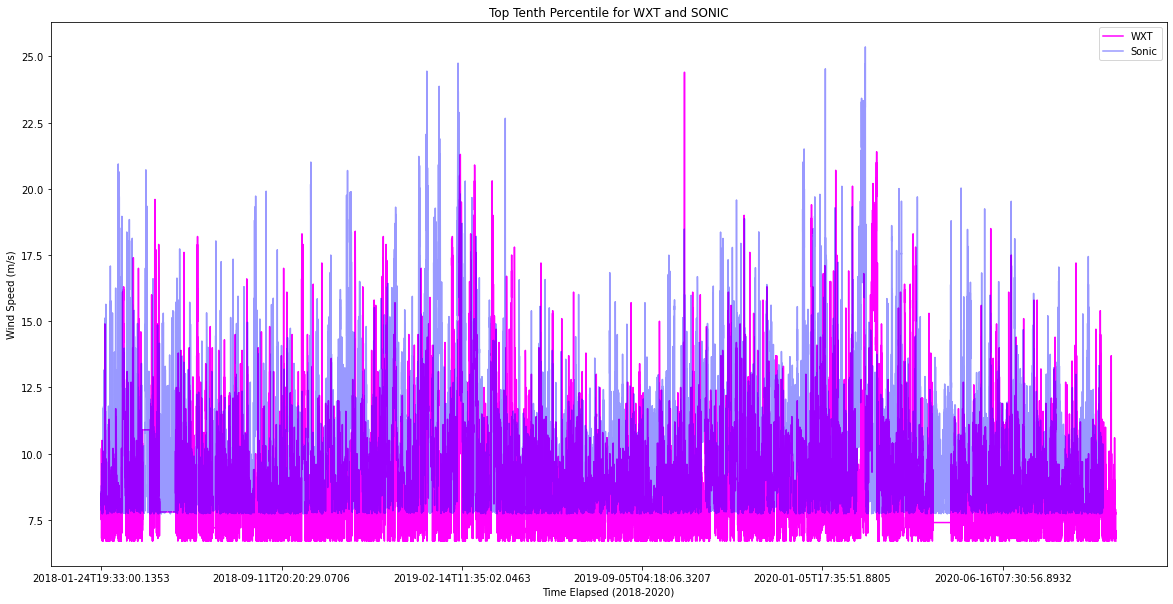

In [38]:
ax = dfWXTS.plot(kind = 'line', x = 'datetime', y = 'wspd', color='magenta', figsize = (20, 10), label = "WXT")
dfSS.plot(kind = 'line', x = 'datetime', y = 'Spd', color = 'blue', alpha = 0.4, figsize = (20, 10), ax = ax, label = "Sonic")
ax.set_xlabel("Time Elapsed (2018-2020)")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Top Tenth Percentile for WXT and SONIC")

Text(0.5, 1.05, 'Wind Rose for Top Ten WXT Data')

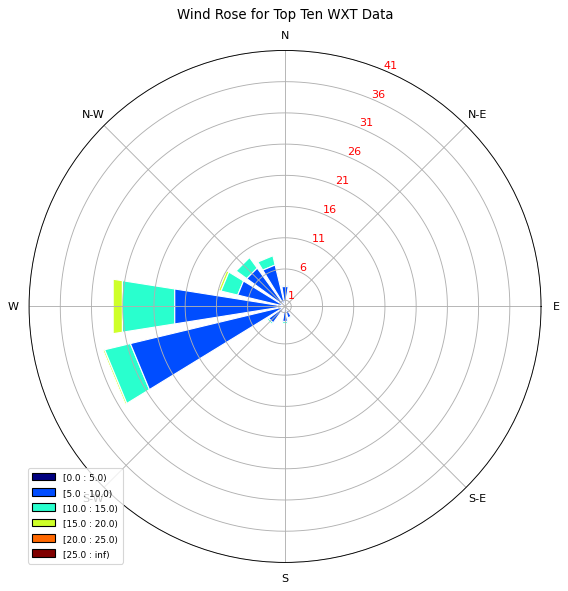

In [50]:
ax = WindroseAxes.from_ax()
bins_range = np.arange(0, 30, 5)
ax.bar(dfWXTS['wdir'], dfWXTS['wspd'], normed=True, opening=0.8, edgecolor='white', bins=bins_range)
ax.set_legend()
ax.set_yticks(np.arange(1, 45, step=5))
ax.set_yticklabels(np.arange(1, 45, step=5), color='r')
ax.set_title('Wind Rose for Top Ten WXT Data')

Text(0.5, 1.05, 'Wind Rose for Top Ten Sonic Data')

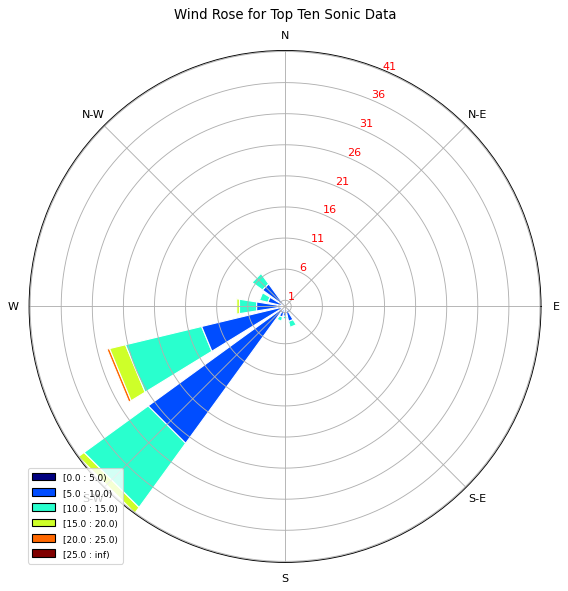

In [49]:
ax = WindroseAxes.from_ax()
bins_range = np.arange(0, 30, 5)
ax.bar(dfSS['Dir'], dfSS['Spd'], normed=True, opening=0.8, edgecolor='white', bins=bins_range)
ax.set_legend()
ax.set_yticks(np.arange(1, 45, step=5))
ax.set_yticklabels(np.arange(1, 45, step=5), color='r')
ax.set_title('Wind Rose for Top Ten Sonic Data')